In [0]:
import numpy as np 
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class TimeSeriesData():
    
    def __init__(self,num_points,xmin,xmax):
        
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
    
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
        
        rand_start = np.random.rand(batch_size,1) 
        
        ts_start = rand_start * (self.xmax- self.xmin - (steps*self.resolution) )
        
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        
        y_batch = np.sin(batch_ts)
        # -1 means numpy will figure it out it should be comatible with given data and steps no of rows and 1 is column
        
        if return_batch_ts:
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) ,batch_ts
        
        else:
            
            return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [0]:
ts_data = TimeSeriesData(250,0,10)

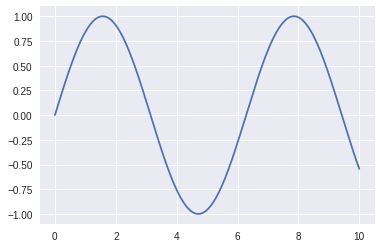

In [33]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [0]:
num_time_steps = 30
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

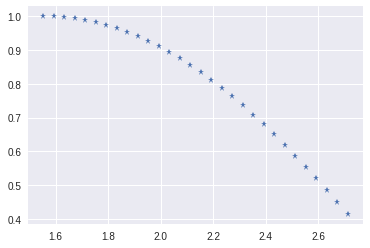

In [37]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

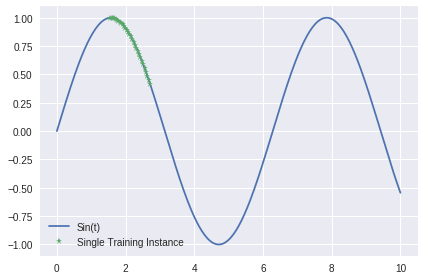

In [39]:
plt.plot(ts_data.x_data,ts_data.y_true,label='Sin(t)')
plt.plot(ts.flatten()[1:],y2.flatten(),'*',label='Single Training Instance')
plt.legend()
plt.tight_layout()

In [0]:
train_inst = np.linspace(5,5 + ts_data.resolution * (num_time_steps + 1), num_time_steps+1)

In [41]:
train_inst

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667,
       6.24      ])

In [42]:
train_inst[:-1]

array([5.        , 5.04133333, 5.08266667, 5.124     , 5.16533333,
       5.20666667, 5.248     , 5.28933333, 5.33066667, 5.372     ,
       5.41333333, 5.45466667, 5.496     , 5.53733333, 5.57866667,
       5.62      , 5.66133333, 5.70266667, 5.744     , 5.78533333,
       5.82666667, 5.868     , 5.90933333, 5.95066667, 5.992     ,
       6.03333333, 6.07466667, 6.116     , 6.15733333, 6.19866667])

In [43]:
train_inst[1:]

array([5.04133333, 5.08266667, 5.124     , 5.16533333, 5.20666667,
       5.248     , 5.28933333, 5.33066667, 5.372     , 5.41333333,
       5.45466667, 5.496     , 5.53733333, 5.57866667, 5.62      ,
       5.66133333, 5.70266667, 5.744     , 5.78533333, 5.82666667,
       5.868     , 5.90933333, 5.95066667, 5.992     , 6.03333333,
       6.07466667, 6.116     , 6.15733333, 6.19866667, 6.24      ])

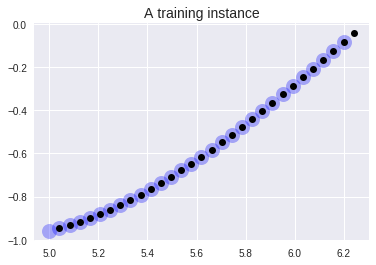

In [46]:
plt.title("A training instance", fontsize=14)
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), "bo", markersize=15,alpha=0.3 ,label="instance")
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), "ko", markersize=7, label="target")

In [0]:
tf.reset_default_graph()

In [48]:
num_time_steps

30

In [0]:
num_inputs = 1
num_neurons = 100
num_outputs = 1
learning_rate = 0.0001
num_train_iterations = 2000
batch_size = 1

In [0]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [0]:
#OutputProjectionWrapper bcoz there are 100 input and we want one output, so we need to project 100 neurons to one input
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)




In [0]:
# cell = tf.contrib.rnn.OutputProjectionWrapper(
#     tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
#     output_size=num_outputs)

In [0]:
# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
#           for layer in range(n_layers)])

In [0]:
# cell = tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu)

In [0]:
# n_neurons = 100
# n_layers = 3

# cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons)
#           for layer in range(n_layers)])

In [57]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [61]:
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = ts_data.next_batch(batch_size, num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./rnn_time_series_model")

0 	MSE: 0.62058485
100 	MSE: 0.57991654
200 	MSE: 0.014297253
300 	MSE: 0.01085189
400 	MSE: 0.03163143
500 	MSE: 0.0014700105
600 	MSE: 0.0045672446
700 	MSE: 0.0071898284
800 	MSE: 0.000280633
900 	MSE: 0.00641089
1000 	MSE: 0.019996287
1100 	MSE: 0.009662383
1200 	MSE: 0.0011330214
1300 	MSE: 0.00905804
1400 	MSE: 0.0076790974
1500 	MSE: 0.0054915473
1600 	MSE: 0.0002469485
1700 	MSE: 0.0015332132
1800 	MSE: 0.0037128704
1900 	MSE: 0.0062820446


In [66]:
with tf.Session() as sess:                          
    saver.restore(sess, "./rnn_time_series_model")   

    X_new = np.sin(np.array(train_inst[:-1].reshape(-1, num_time_steps, num_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})

INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


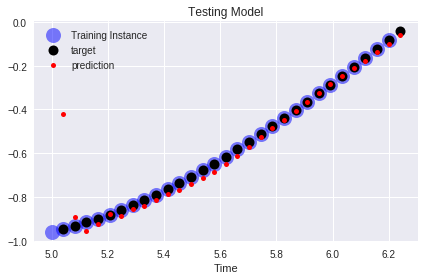

In [63]:
plt.title("Testing Model")

# Training Instance
plt.plot(train_inst[:-1], np.sin(train_inst[:-1]), "bo", markersize=15,alpha=0.5, label="Training Instance")

# Target to Predict
plt.plot(train_inst[1:], np.sin(train_inst[1:]), "ko", markersize=10, label="target")

# Models Prediction
plt.plot(train_inst[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")

plt.xlabel("Time")
plt.legend()
plt.tight_layout()

In [65]:
outputs

<tf.Tensor 'rnn/transpose_1:0' shape=(?, 30, 1) dtype=float32>

In [0]:
## generating complete new sequence 

In [68]:
with tf.Session() as sess:
    saver.restore(sess, "./rnn_time_series_model")

    # SEED WITH ZEROS
    zero_seq_seed = [0. for i in range(num_time_steps)]
    for iteration in range(len(ts_data.x_data) - num_time_steps):
        X_batch = np.array(zero_seq_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        zero_seq_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


Text(0, 0.5, 'Value')

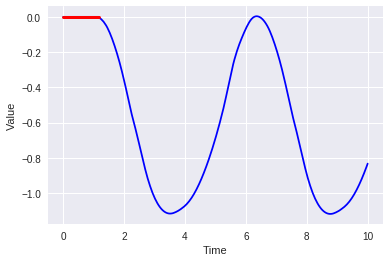

In [69]:
plt.plot(ts_data.x_data, zero_seq_seed, "b-")
plt.plot(ts_data.x_data[:num_time_steps], zero_seq_seed[:num_time_steps], "r", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")

In [70]:
with tf.Session() as sess:
    saver.restore(sess, "./rnn_time_series_model")

    # SEED WITH Training Instance
    training_instance = list(ts_data.y_true[:30])
    for iteration in range(len(training_instance) -num_time_steps):
        X_batch = np.array(training_instance[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        training_instance.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./rnn_time_series_model


Text(0.5, 0, 'Time')

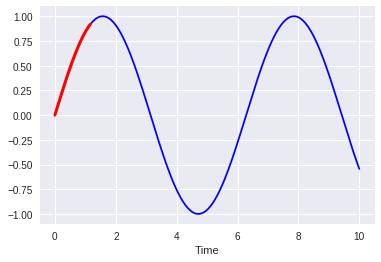

In [71]:
plt.plot(ts_data.x_data, ts_data.y_true, "b-")
plt.plot(ts_data.x_data[:num_time_steps],training_instance[:num_time_steps], "r-", linewidth=3)
plt.xlabel("Time")

In [0]:
training_instance=list(ts_data.y_true[:30])

In [74]:
len(training_instance) -num_time_steps

0

In [76]:
np.array(training_instance[-num_time_steps:])

array([0.        , 0.04014985, 0.08023495, 0.12019066, 0.15995254,
       0.19945647, 0.23863875, 0.27743618, 0.3157862 , 0.35362697,
       0.39089746, 0.42753756, 0.46348819, 0.49869137, 0.53309033,
       0.56662959, 0.59925508, 0.63091417, 0.66155581, 0.69113058,
       0.7195908 , 0.74689056, 0.77298584, 0.79783456, 0.82139664,
       0.84363408, 0.86451103, 0.88399382, 0.90205103, 0.91865353])

In [77]:
training_instance

[0.0,
 0.040149847743319894,
 0.0802349474154223,
 0.12019065536174285,
 0.15995253659263495,
 0.1994564686951286,
 0.2386387452406093,
 0.2774361785216553,
 0.315786201452354,
 0.3536269684677661,
 0.3908974552598219,
 0.42753755718880904,
 0.46348818621174703,
 0.4986913661713371,
 0.5330903262918172,
 0.5666295927309473,
 0.5992550780404792,
 0.6309141683908454,
 0.6615558084194005,
 0.6911305835653855,
 0.7195907997588342,
 0.7468905603349141,
 0.7729858400496613,
 0.7978345560777509,
 0.821396635877804,
 0.8436340818157902,
 0.8645110324423091,
 0.8839938203249303,
 0.9020510263423315,
 0.9186535303526708]

In [0]:
## Exercise

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
milk = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data_sets/monthly-milk-production.csv',index_col='Month')

In [4]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [0]:
milk.index = pd.to_datetime(milk.index)

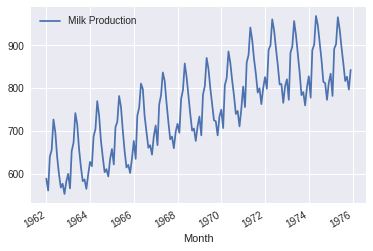

In [6]:
milk.plot()

In [7]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [0]:

train_set = milk.head(156)
test_set = milk.tail(12)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_set)

In [0]:
test_scaled = scaler.transform(test_set)

In [10]:
train_scaled.shape

(156, 1)

In [0]:
 rand_start=np.random.randint(0,len(train_scaled)-5) 

In [0]:
y_batch = np.array(train_scaled[rand_start:rand_start+5+1])

In [13]:
y_batch.reshape(1,5+1)

array([[0.97115385, 0.89182692, 0.78846154, 0.68269231, 0.55528846,
        0.57211538]])

In [0]:
def next_batch(training_data,batch_size,steps):
    rand_start = np.random.randint(0,len(training_data)-steps) 
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [0]:
import tensorflow as tf

In [0]:
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1
learning_rate = 0.03 
num_train_iterations = 4000
batch_size = 1

In [0]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [18]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs)





For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [19]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 139.83318
100 	MSE: 0.011057503
200 	MSE: 0.01016464
300 	MSE: 0.009197277
400 	MSE: 0.01024433
500 	MSE: 0.0063383467
600 	MSE: 0.011035676
700 	MSE: 0.008964176
800 	MSE: 0.012863775
900 	MSE: 0.0067819525
1000 	MSE: 0.0073625445
1100 	MSE: 0.0076653394
1200 	MSE: 0.009319235
1300 	MSE: 0.0053836317
1400 	MSE: 0.0140359225
1500 	MSE: 0.009532244
1600 	MSE: 0.008391823
1700 	MSE: 0.013303052
1800 	MSE: 0.010302086
1900 	MSE: 0.010207565
2000 	MSE: 0.011318275
2100 	MSE: 0.0087050125
2200 	MSE: 0.00650322
2300 	MSE: 0.009753412
2400 	MSE: 0.010407346
2500 	MSE: 0.010374936
2600 	MSE: 0.009047061
2700 	MSE: 0.0107723875
2800 	MSE: 0.009430145
2900 	MSE: 0.007249554
3000 	MSE: 0.008309926
3100 	MSE: 0.011910877
3200 	MSE: 0.015187987
3300 	MSE: 0.0043130205
3400 	MSE: 0.006601082
3500 	MSE: 0.00402198
3600 	MSE: 0.0044682804
3700 	MSE: 0.01058086
3800 	MSE: 0.0033598198
3900 	MSE: 0.013412095


In [24]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


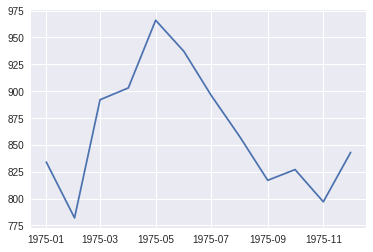

In [25]:
plt.plot(test_set)

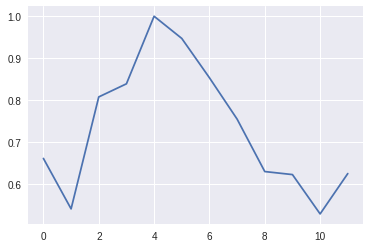

In [32]:
plt.plot(train_scaled[-12:])

In [0]:
train_seed = list(train_scaled[-12:])

In [28]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625])]

In [29]:
num_time_steps


12

In [34]:
with tf.Session() as sess:
    saver.restore(sess, "./ex_time_series_model")
    # Create a numpy array for your genreative seed from the last 12 months of the 
    train_seed = list(train_scaled[-12:])
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [37]:
y_pred[0, -1, 0]

0.17023344

In [39]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))
test_set['Generated'] = results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
test_set

,Milk Production,Generated
Month,,
1975-01-01 01:00:00,834.0,785.402405
1975-02-01 01:00:00,782.0,766.936646
1975-03-01 01:00:00,892.0,757.424561
1975-04-01 01:00:00,903.0,717.843506
1975-05-01 01:00:00,966.0,714.040039
1975-06-01 01:00:00,937.0,692.436951
1975-07-01 01:00:00,896.0,671.277893
1975-08-01 01:00:00,858.0,650.612732
1975-09-01 01:00:00,817.0,640.310547


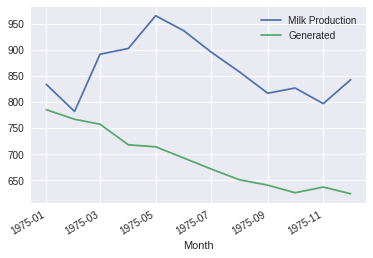

In [41]:
test_set.plot()